In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
pd.set_option('display.max_columns',None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
for i in df.columns:
    print(df[i].value_counts())

7739-LAXOG    1
1450-SKCVI    1
6771-XWBDM    1
2874-YXVVA    1
8999-BOHSE    1
             ..
2004-OCQXK    1
6479-SZPLM    1
3085-QUOZK    1
8947-YRTDV    1
5520-FVEWJ    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

From the above value counts we can see that there are 11 values in the TotalCharges column are blank.

In [8]:
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


The type of the column TotalCharges is Object type, let us convert it to flot type.

In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.NaN)

In [10]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

In [11]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [12]:
df['TotalCharges'].value_counts()

20.200000      11
2283.300441    11
19.750000       9
19.900000       8
19.650000       8
               ..
1066.150000     1
249.950000      1
8333.950000     1
7171.700000     1
1024.000000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [13]:
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ",categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)

Categorical Columns:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical Columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


The columns CustomerID is not required, let us drop it.

In [14]:
df.drop(columns=['customerID'],axis=1,inplace=True)

In [15]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Univariate Analysis

No     5174
Yes    1869
Name: Churn, dtype: int64


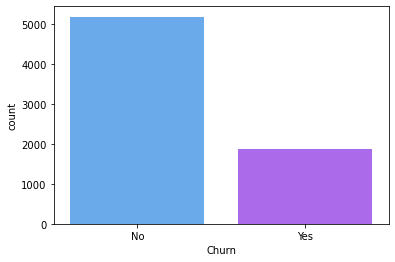

In [17]:
print(df['Churn'].value_counts())
sns.countplot(df['Churn'],palette="cool")
plt.show()

As we can see the count of No is very high when compared to Yes, we shall take care of it by using oversampling.

Male      3555
Female    3488
Name: gender, dtype: int64


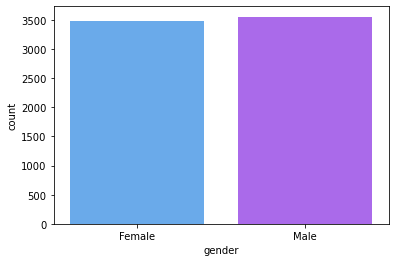

In [18]:
print(df['gender'].value_counts())
sns.countplot(df['gender'],palette='cool')
plt.show()

From the plot we can observe that the total number of male and female customers are almost equal.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


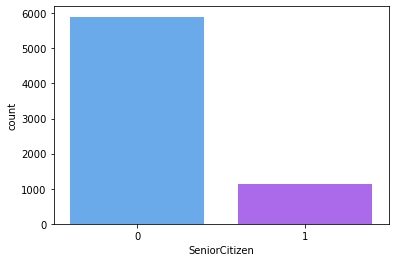

In [19]:
print(df['SeniorCitizen'].value_counts())
sns.countplot(df['SeniorCitizen'],palette='cool')
plt.show()

0 - non senior citizens\
1 - senior citizens\
The number of non senior citizens is high when compared to senior citizens.

No     3641
Yes    3402
Name: Partner, dtype: int64


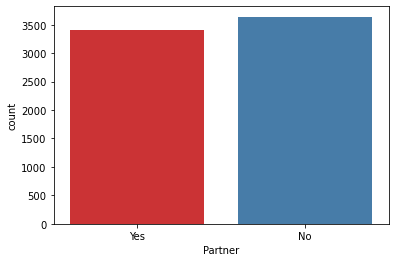

In [20]:
print(df['Partner'].value_counts())
sns.countplot(df['Partner'],palette='Set1')
plt.show()

No     4933
Yes    2110
Name: Dependents, dtype: int64


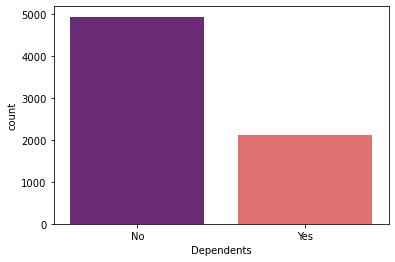

In [21]:
print(df['Dependents'].value_counts())
sns.countplot(df['Dependents'],palette='magma')
plt.show()

The customers with dependants are lesser than customers with dependants.

Yes    6361
No      682
Name: PhoneService, dtype: int64


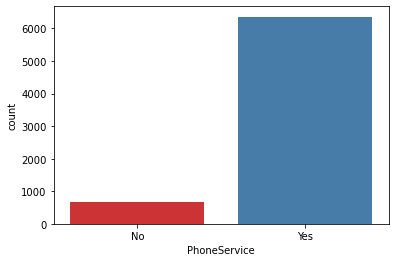

In [22]:
print(df['PhoneService'].value_counts())
sns.countplot(df['PhoneService'],palette='Set1')
plt.show()

The customers who have phone services is higher than who do not use phone services is less.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


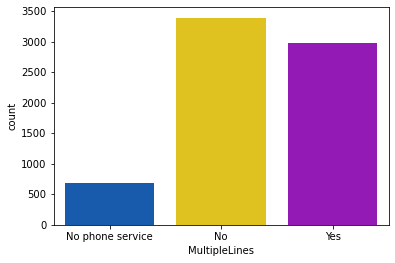

In [23]:
print(df['MultipleLines'].value_counts())
sns.countplot(df['MultipleLines'],palette='prism')
plt.show()

The customers having single line phone services is high when compared to the customers having phone services from multiple lines. The customers who do not have phone services are the least when compared to the others.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


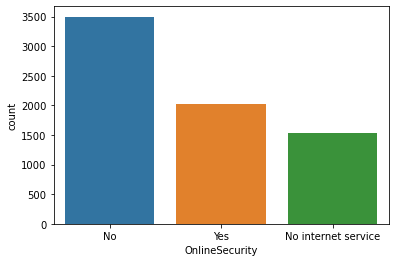

In [24]:
print(df['OnlineSecurity'].value_counts())
sns.countplot(df['OnlineSecurity'])
plt.show()

We can see that most of the customers do not have Online security when compared to those who have online security. And 1526 customers do not use the Internet service.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


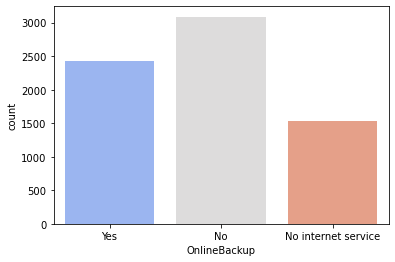

In [25]:
print(df['OnlineBackup'].value_counts())
sns.countplot(df['OnlineBackup'],palette='coolwarm')
plt.show()

We can see that the customers who do not have internet access, they do not need any device protection.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


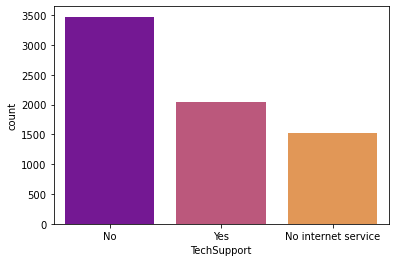

In [26]:
print(df['TechSupport'].value_counts())
sns.countplot(df['TechSupport'],palette='plasma')
plt.show()

Most customers do not need tech support.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


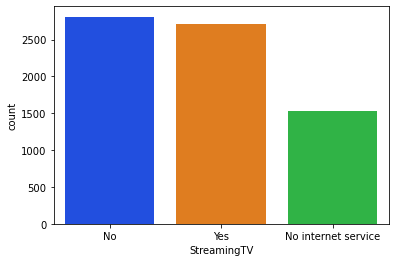

In [27]:
print(df["StreamingTV"].value_counts())
sns.countplot(df["StreamingTV"],palette="bright")
plt.show()

The count of customers streaming and not streaming TV is almost the same and 1526 customers do have an Internet connecion.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


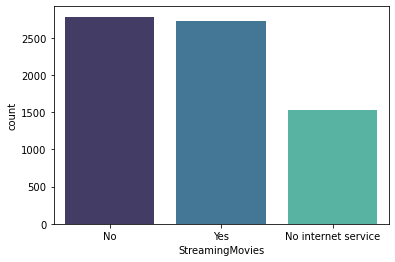

In [28]:
print(df["StreamingMovies"].value_counts())
sns.countplot(df["StreamingMovies"],palette="mako")
plt.show()

The customers who do not Stream movies are high in count followed by the customers who have Streaming movies services. The customers who do not have internet servicesis the least when compared to others.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


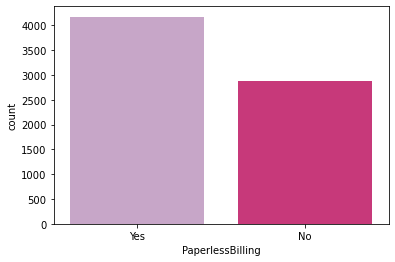

In [29]:
print(df["PaperlessBilling"].value_counts())
sns.countplot(df["PaperlessBilling"],palette="PuRd")
plt.show()

Most of the customers prefer paperless billing over paper billing.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


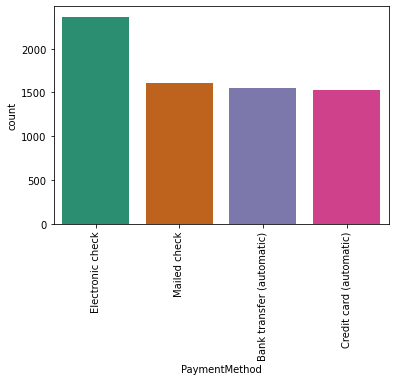

In [30]:
print(df["PaymentMethod"].value_counts())
sns.countplot(df["PaymentMethod"],palette="Dark2")
plt.xticks(rotation=90)
plt.show()

Most customers prefer Electronic check payment method and the customers who prefer Mailed Check, bank transfer and Credit card have similar count.

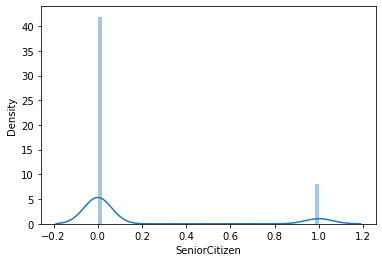

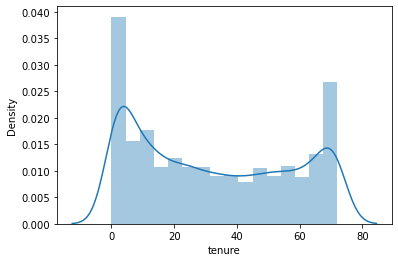

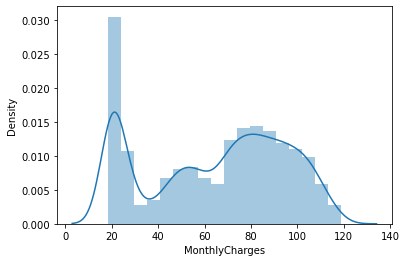

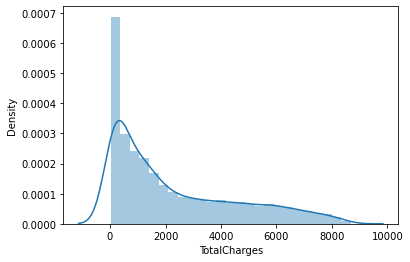

In [31]:
for i in numerical_col:
    sns.distplot(df[i])
    plt.show()

# Bivariate Analysis

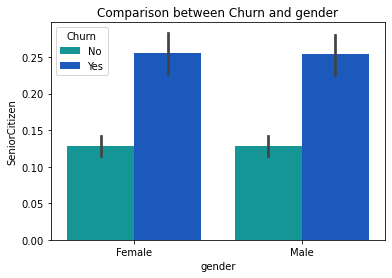

In [34]:
plt.title("Comparison between Churn and gender")
sns.barplot(x='gender',y='SeniorCitizen',data=df,palette='winter_r',hue='Churn')
plt.show()

The count of female/male senior citizens are almost the same and the count of male/female customers who are not senior citizens are also almost the same.

In [33]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

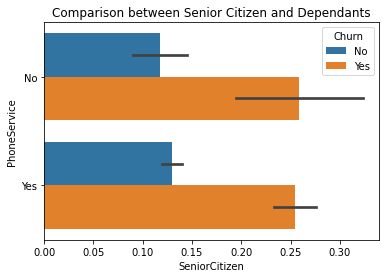

In [38]:
plt.title("Comparison between Senior Citizen and Dependants")
sns.barplot(x='SeniorCitizen',y='PhoneService',hue='Churn',data=df)
plt.show()

As we can see a almost equal number of SeniorCitizens who use/do not use phone services and have left the company(Churn = Yes).

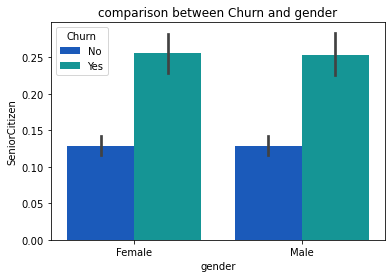

In [39]:
plt.title("comparison between Churn and gender")
sns.barplot(x='gender',y='SeniorCitizen',data=df,palette='winter',hue='Churn')
plt.show()

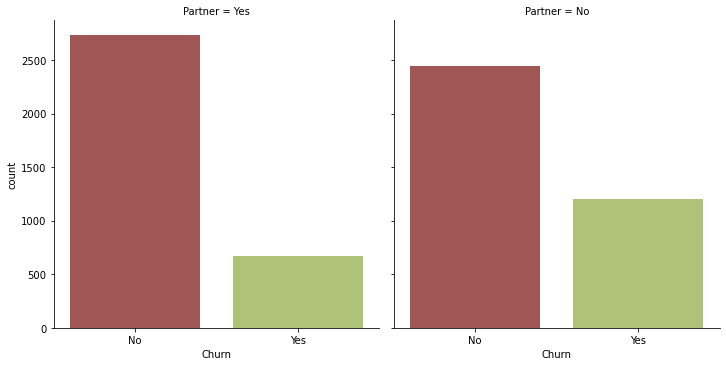

In [40]:
sns.catplot(x='Churn',col='Partner',data=df,palette='tab20b_r',kind="count")

We can see the customers without partners have high churn rate compared to the customers with partners.

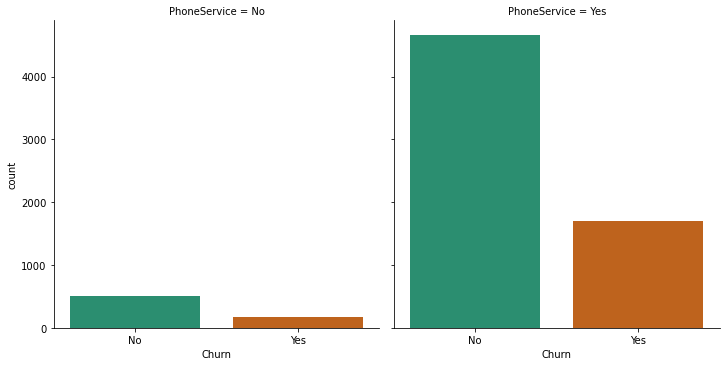

In [41]:
sns.catplot(x='Churn',col='PhoneService',data=df,palette="Dark2",kind="count")

We can see the customers who use phone services have high churn.

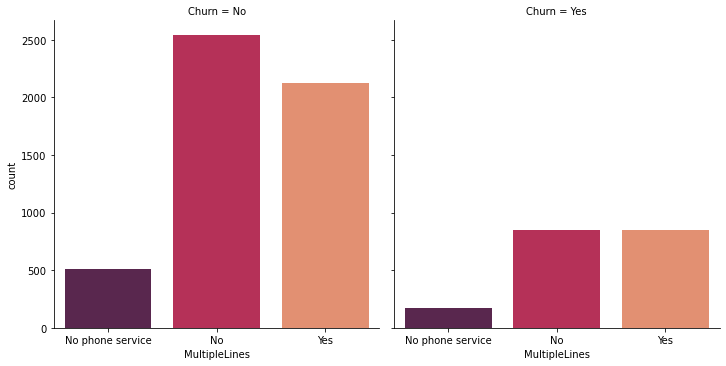

In [43]:
sns.catplot(x= 'MultipleLines',col='Churn',palette="rocket",kind="count",data=df)

The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services.

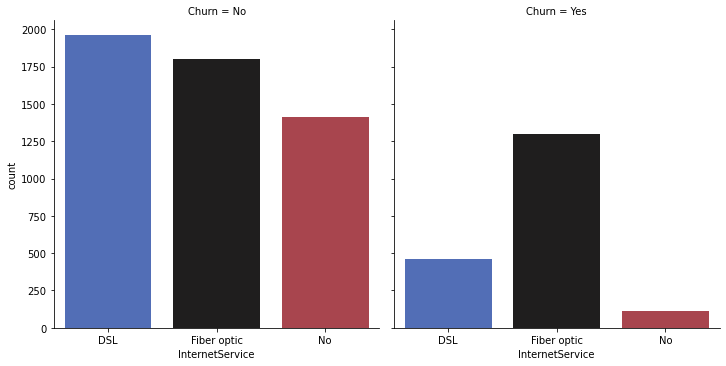

In [45]:
sns.catplot(x='InternetService',col='Churn',palette="icefire",kind="count",data=df)

The churn is high when the customers prefer Fiber optic internet services compared to other services, may be this type of service is bad. The customers who own DSL service they have very less churn rate.

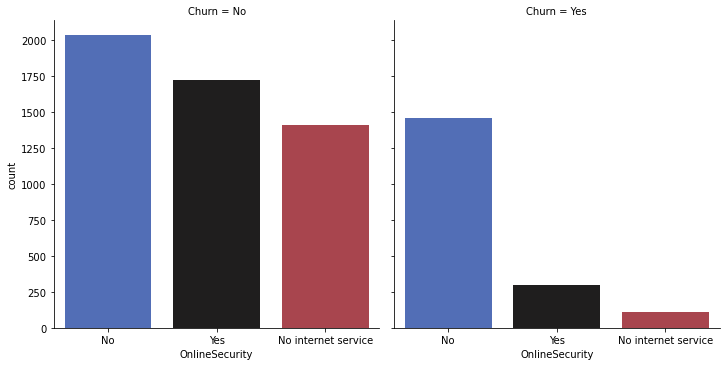

In [46]:
sns.catplot(x='OnlineSecurity',col='Churn',palette="icefire",kind="count",data=df)

The customers who have no internet service have very less churn rate and the customers who do not have online security services have higher churn rate.

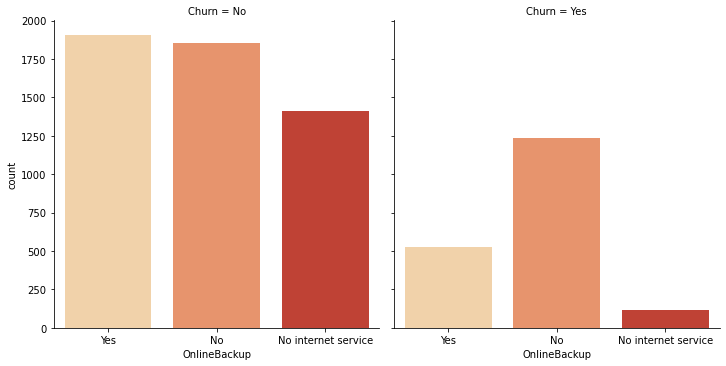

In [47]:
sns.catplot(x='OnlineBackup',col='Churn',palette="OrRd",kind="count",data=df)

It is obvious that the customers who do not have internet services do not need any online backup. The customers who do not have online backup services they have high churn rate.

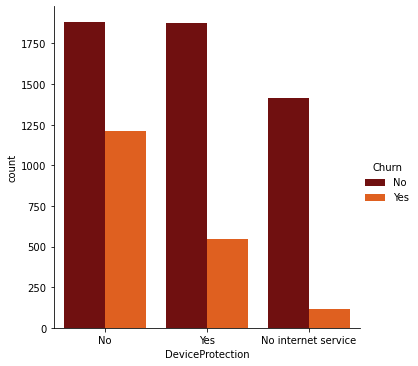

In [48]:
sns.catplot(x='DeviceProtection',hue='Churn',palette="gist_heat",kind="count",data=df)

The customers who do not own any Device protection have very high churn rate compared to others.

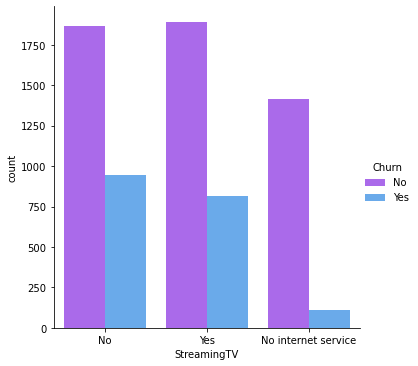

In [49]:
sns.catplot(x='StreamingTV',hue='Churn',palette="cool_r",kind="count",data=df)

The churn rate is nearly same if the customer own StreamingTV or not.

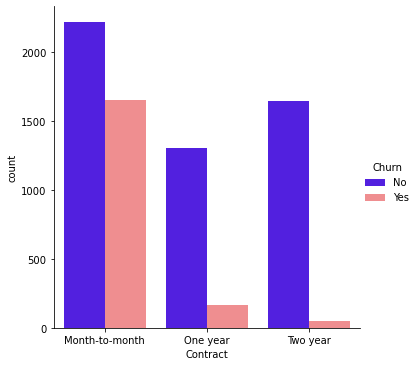

In [50]:
sns.catplot(x='Contract',hue='Churn',palette="gnuplot2",kind="count",data=df)

Most customers who have a month-to-month contract have left the company.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

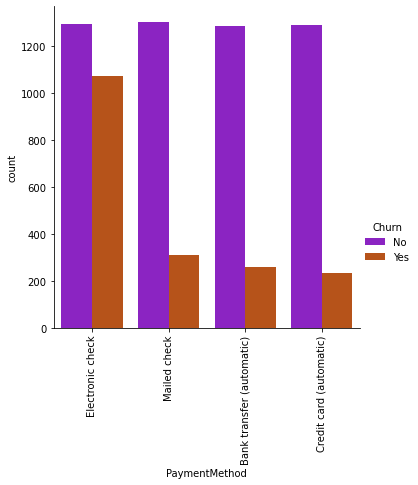

In [52]:
sns.catplot(x='PaymentMethod',hue='Churn',palette="gnuplot",kind="count",data=df)
plt.xticks(rotation=90)

The customers who prefer Electronic check have high churn rate also the customers who existing in the company uses equal payment method.



# Multivariate Analysis

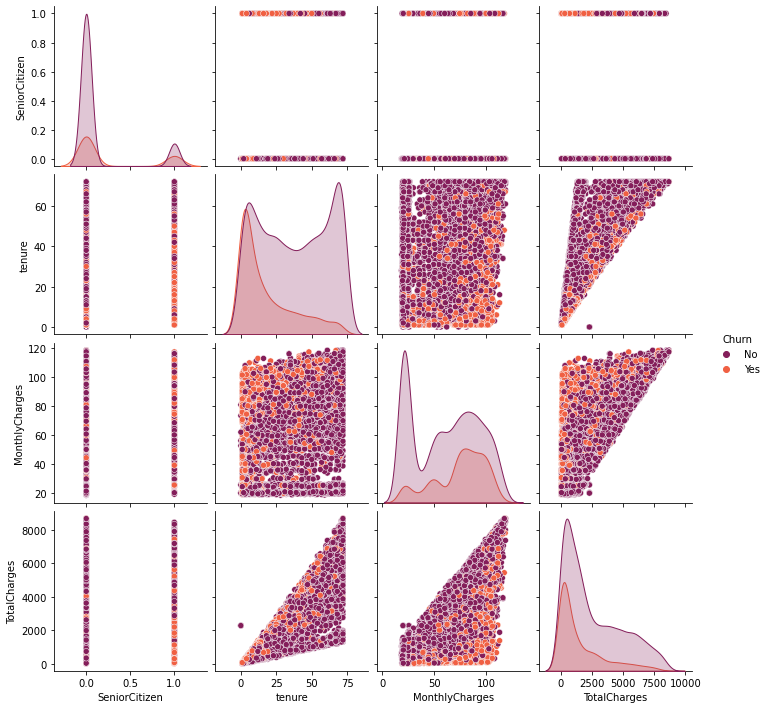

In [57]:
sns.pairplot(df,hue="Churn",palette="rocket")
plt.show()

# Outliers

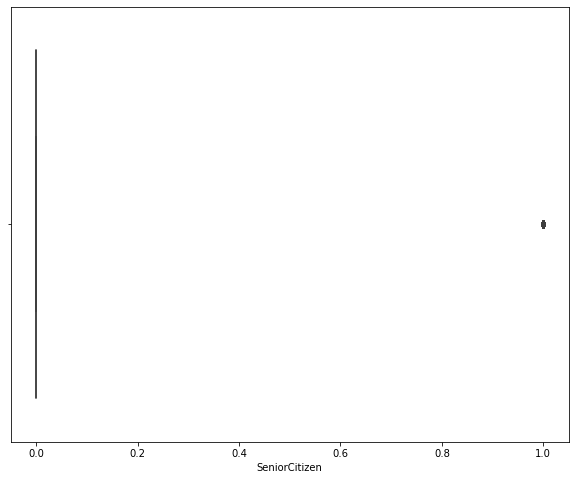

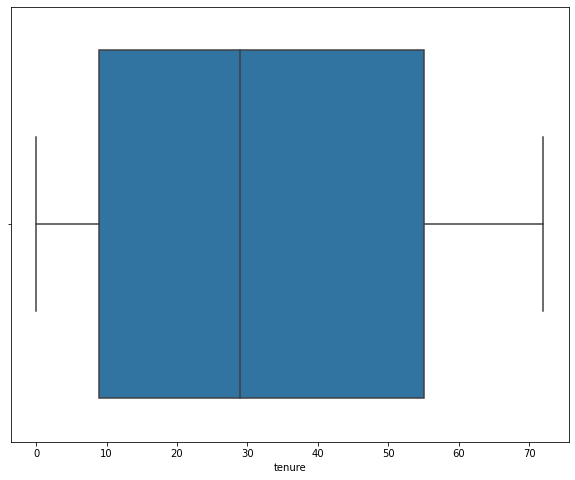

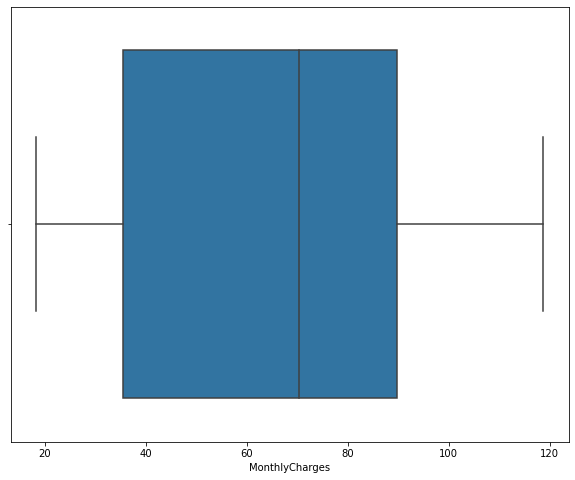

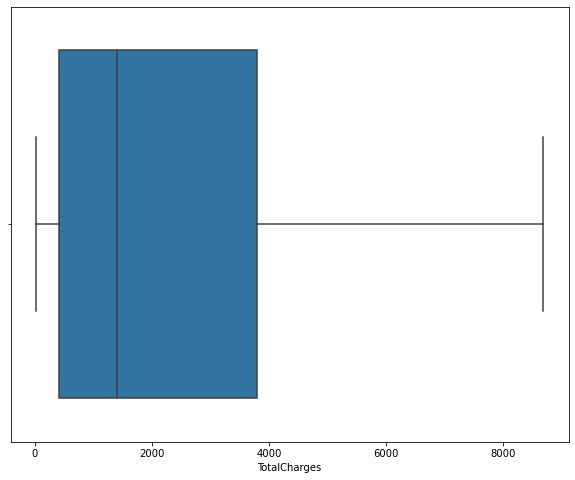

In [59]:
for i in numerical_col:
    plt.figure(figsize=(10,8))
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [60]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

The SeniorCitizen column, is a caegorical column, so we do not have to remove the outliers.

# Skewness

In [61]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

There is skew data in TotalCharges

In [62]:
df['TotalCharges'] = np.cbrt(df['TotalCharges'])

In [63]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

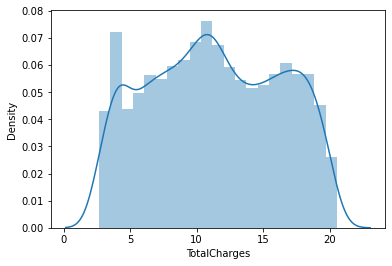

In [64]:
sns.distplot(df['TotalCharges'])

Data now looks normally distributed.

# Ordinal Encoding

In [66]:
#Encoding the categorical columns.
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1, 1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


# Correlation

In [67]:
corr = df.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


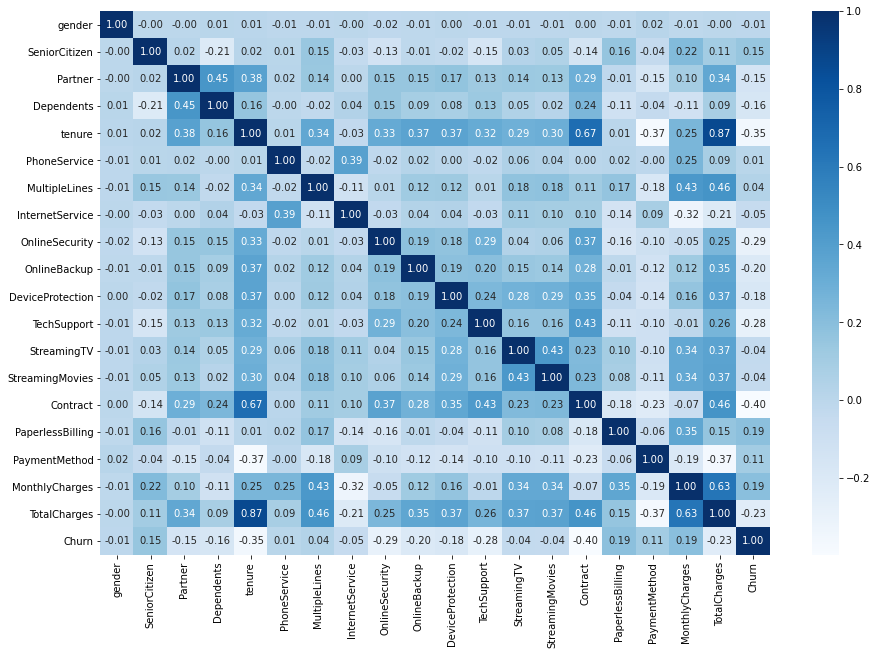

In [73]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,fmt =".2f",annot=True,cmap="Blues")
plt.show()

The following is observed from the heatmap:
1. There is no strong correlation between any feature and the label.
2. The features "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "PhoneServices", "SeniorCitizen", "MultipleLines" have a positive correlation with the target.
3. The gender column has the least correlation with the target so we can drop it.

In [74]:
df.drop(columns=['gender'],axis=1,inplace=True)

In [77]:
x = df.drop("Churn",axis=1)
y = df["Churn"]

In [78]:
x.shape, y.shape

((7043, 18), (7043,))

# Standard Scaler

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716


# Checking VIF(Multicolinearity)

In [81]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
# Let's check the values
vif

,VIF values,Features
0,1.149702,SeniorCitizen
1,1.462883,Partner
2,1.383740,Dependents
3,12.356421,tenure
4,1.622391,PhoneService
5,1.398327,MultipleLines
6,1.869966,InternetService
7,1.255740,OnlineSecurity
8,1.192496,OnlineBackup
9,1.288528,DeviceProtection


TotalCharges feature have VIF>10, so let us drop it.

In [82]:
x.drop(columns=['TotalCharges'],axis=1,inplace=True)

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
# Let's check the values
vif

,VIF values,Features
0,1.149636,SeniorCitizen
1,1.460767,Partner
2,1.381892,Dependents
3,2.752907,tenure
4,1.622282,PhoneService
5,1.391628,MultipleLines
6,1.825819,InternetService
7,1.247231,OnlineSecurity
8,1.185742,OnlineBackup
9,1.280128,DeviceProtection


We have now solved Multicolinearity problem

In [84]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

There is a lot of data imbalance, let us use SMOTE() and oversample the data.

In [85]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [86]:
y.value_counts()

1.0    5174
0.0    5174
Name: Churn, dtype: int64

# Model Building

### Best Random State

In [90]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random_state",maxRS)

Best accuracy is  0.8634460547504026 at random_state 141


In [91]:
x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=maxRS)

In [92]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# Random Forest Classifier

In [93]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8579710144927536
[[1301  243]
 [ 198 1363]]
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86      1544
         1.0       0.85      0.87      0.86      1561

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



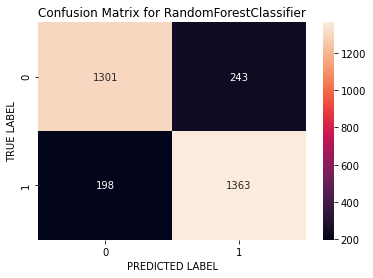

In [94]:
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
sns.heatmap(cm, annot = True, fmt = ".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# ExtraTreesClassifier

In [95]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8624798711755234
[[1307  237]
 [ 190 1371]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1544
         1.0       0.85      0.88      0.87      1561

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



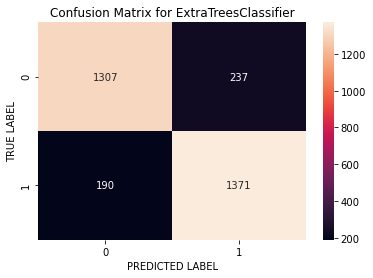

In [96]:
cm = confusion_matrix(y_test,predET)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
sns.heatmap(cm, annot = True, fmt = ".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for ExtraTreesClassifier')
plt.show()

# Logistic Regression


In [97]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7822866344605475
[[1146  398]
 [ 278 1283]]
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77      1544
         1.0       0.76      0.82      0.79      1561

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



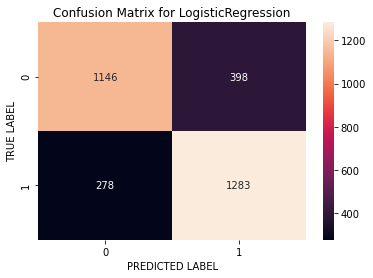

In [98]:
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
sns.heatmap(cm, annot = True, fmt = ".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

# Support Vector Machine Classifier


In [99]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8093397745571659
[[1188  356]
 [ 236 1325]]
              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80      1544
         1.0       0.79      0.85      0.82      1561

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



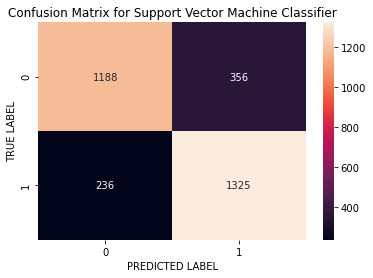

In [100]:
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
sns.heatmap(cm, annot = True, fmt = ".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# Gradient Boosting Classifier


In [101]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8428341384863124
[[1253  291]
 [ 197 1364]]
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84      1544
         1.0       0.82      0.87      0.85      1561

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



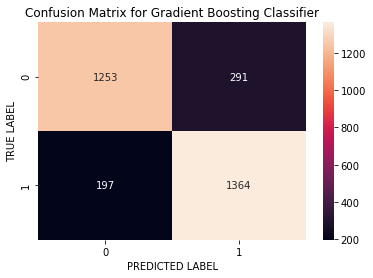

In [102]:
cm = confusion_matrix(y_test,predGB)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
sns.heatmap(cm, annot = True, fmt = ".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# AdaBoost Classifier


In [103]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8180354267310789
[[1184  360]
 [ 205 1356]]
              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81      1544
         1.0       0.79      0.87      0.83      1561

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



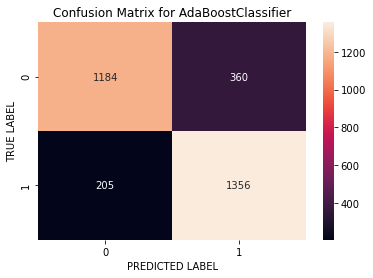

In [104]:
cm = confusion_matrix(y_test,predABC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
sns.heatmap(cm, annot = True, fmt = ".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoostClassifier')
plt.show()

# Bagging Classifier

In [105]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8380032206119162
[[1326  218]
 [ 285 1276]]
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      1544
         1.0       0.85      0.82      0.84      1561

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



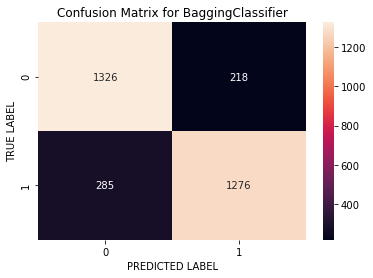

In [106]:
cm = confusion_matrix(y_test,predBC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
sns.heatmap(cm, annot = True, fmt = ".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for BaggingClassifier')
plt.show()

# XGB Classifier


In [107]:
XGB = xgb(verbosity=0)
XGB.fit(x_train,y_train)
predXGB = XGB.predict(x_test)
print(accuracy_score(y_test,predXGB))
print(confusion_matrix(y_test,predXGB))
print(classification_report(y_test,predXGB))

0.8541062801932368
[[1314  230]
 [ 223 1338]]
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1544
         1.0       0.85      0.86      0.86      1561

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



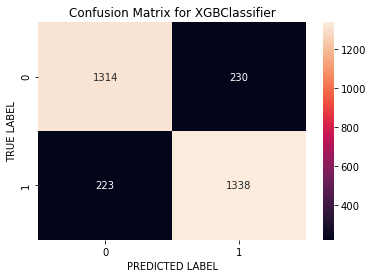

In [108]:
cm = confusion_matrix(y_test,predXGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
sns.heatmap(cm, annot = True, fmt = ".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBClassifier')
plt.show()

# Cross Validation Score

In [109]:
from sklearn.model_selection import cross_val_score

In [111]:
print("Cross_Validation_Score using Random Forest Classifier:",cross_val_score(RFC,x,y,cv=5).mean())

Cross_Validation_Score using Random Forest Classifier: 0.8493532080423458


In [112]:
print("Cross_Validation_Score using ExtraTress Classifier:",cross_val_score(ET,x,y,cv=5).mean())

Cross_Validation_Score using ExtraTress Classifier: 0.8611406476558724


In [113]:
print("Cross_Validation_Score using Logistic Regression:",cross_val_score(LR,x,y,cv=5).mean())

Cross_Validation_Score using Logistic Regression: 0.7716486528767194


In [114]:
print("Cross_Validation_Score using Support Vactor Machine Classifier:",cross_val_score(svc,x,y,cv=5).mean())

Cross_Validation_Score using Support Vactor Machine Classifier: 0.7970659587235543


In [115]:
print("Cross_Validation_Score using Gradient Boosting Classifier:",cross_val_score(GB,x,y,cv=5).mean())

Cross_Validation_Score using Gradient Boosting Classifier: 0.8305073514475241


In [116]:
print("Cross_Validation_Score using ADA Boosting Classifier:",cross_val_score(ABC,x,y,cv=5).mean())

Cross_Validation_Score using ADA Boosting Classifier: 0.8092440278974417


In [117]:
print("Cross_Validation_Score using Bagging Classifier:",cross_val_score(BC,x,y,cv=5).mean())

Cross_Validation_Score using Bagging Classifier: 0.8231662709003158


In [118]:
print("Cross_Validation_Score using XG Boost Classifier:",cross_val_score(XGB,x,y,cv=5).mean())

Cross_Validation_Score using XG Boost Classifier: 0.8314794656804029


### Best Model - ExtraTrees Classifier

# Hyper Parameter Tuning

In [119]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [120]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [121]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [122]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 10}

In [124]:
final_model = ExtraTreesClassifier(criterion='gini',max_depth=20,n_estimators=200,n_jobs=-2,random_state=10)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

86.9243156199678


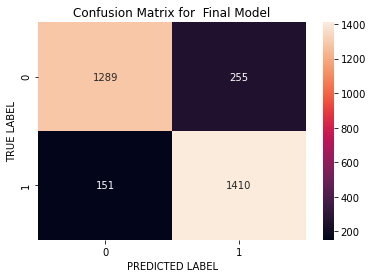

In [125]:
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
sns.heatmap(cm, annot = True, fmt = ".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

# Plotting ROC and compare AUC for all the models used

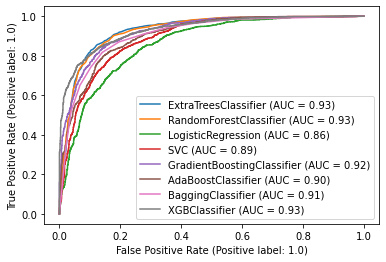

In [126]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(ET,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, x_test, y_test, ax=disp.ax_)

plt.show()

# ROC Curve for the Best Model

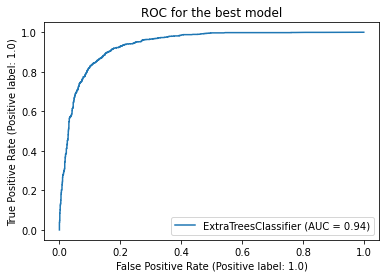

In [127]:
plot_roc_curve(final_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

# Saving the model

In [130]:
import pickle
filename = 'churn.pkl'
pickle.dump(ET,open(filename,'wb'))

# Prediction Results

In [132]:
import numpy as np
a = np.array(y_test)
predicted = np.array(ET.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
3100,1.0,1.0
3101,1.0,0.0
3102,1.0,1.0
3103,0.0,0.0
